# Dual Plane Analysis

### Notebook for processing and analyzing dual plane somatic and dendritic recordings

In [1]:
import os
import numpy as np
from Lab_Analyses.Dual_Plane.organize_dual_plane_data import organize_dual_plane_data
from Lab_Analyses.Dual_Plane.analyze_dual_plane_data import analyze_dual_plane_data
from Lab_Analyses.Dual_Plane import plot_dual_plane_data as plotting
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

### Datasets
Specify which mice to be analyzed

In [2]:
# Mouse ids
id_1 = "JW129"
id_2 = "JW130"
id_3 = "JW167"

mouse_list = [id_2, id_3]


### Data Organization
Organize the dual plane data

In [ ]:
# Reprocess?
reprocess = True

# Inputs
data_dir = "two_plane"
file_types = {"Dendrite": "dendrite", "Soma": "soma"}

# Preprocess data
for mouse in mouse_list:
    organize_dual_plane_data(mouse_id=mouse, data_dir=data_dir, file_types=file_types, reprocess=reprocess, save=True)

### Analyze dual plane data

In [3]:
# Save path
group_path = r'G:\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
dual_plane_dir = "Dual_Plane"
dual_plane_path = os.path.join(group_path, experiment_dir, dual_plane_dir)

# Analyze
reanalyze = True
if reanalyze:
    dual_plane_data = analyze_dual_plane_data(mouse_list, save=True, save_path=dual_plane_path)
else:
    dual_plane_data = load_pickle(["analyzed_dual_plane_data"], path=dual_plane_path)[0]

Dataset number: 4


### Visualize Data

In [4]:
# Set up figure save path
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
fig_path = os.path.join(initial_path, experiment_dir, dual_plane_dir)
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

In [ ]:
# Plot the traces
plotting.plot_soma_dend_traces(
    dual_plane_data,
    colors=["forestgreen", "black"],
    norm=True,
    subselect=None, 
    save=False, 
    save_path=fig_path,
)

In [ ]:
# Plot fraction coactivity
plotting.plot_soma_dend_coactivity(
    dual_plane_data,
    colors=["black", "forestgreen"],
    mean_type="mean", 
    err_type="sem",
    norm=True,
    trace_avg="dend",
    figsize=(11,5),
    save=True,
    save_path=fig_path,
)

15
Number of soma-dendrite pairs: 15
Number of dendrite-dendrite pairs: 50
Total soma-dendrite paired events: 225
Total dendrite-dendrite paired events: 701


<IPython.core.display.Javascript object>


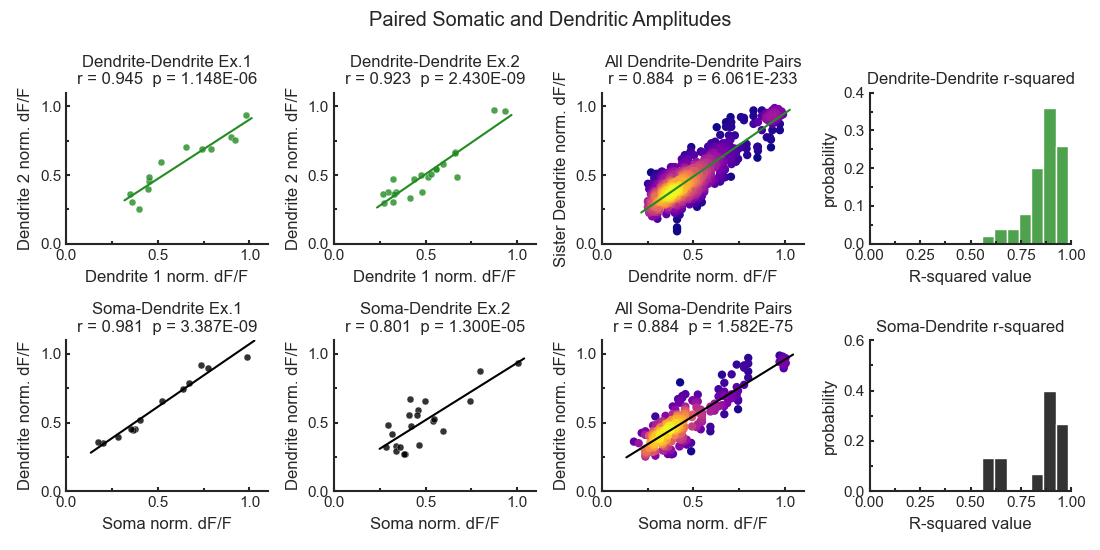

In [5]:
# Plot paired event amplitudes
plotting.plot_amplitude_correlations(
    dual_plane_data,
    norm=True,
    dend_examples=[6,11],
    soma_examples=[6,11],
    color=["forestgreen", "black"],
    figsize=(11, 5.5),
    corr_lim=(0,1.1),
    s_size=25,
    s_alpha=0.8,
    bins=7,
    save=False,
    save_path=fig_path,
)

In [ ]:
# Plot individual events
plotting.plot_ind_events(
    dual_plane_data,
    colors=["black", "forestgreen"],
    norm=True,
    event_type="noncoactive",
    figsize=(3,3),
    save=False,
    save_path=fig_path
)